In [28]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
import dill
import pickle as pkl
import sys
sys.path.append('../')

from hyperneat.hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
from dynamic_env.traverser import DynamicObstacleTraverser


import itertools as it
import time
import imageio

from matplotlib import pyplot as plt


from sgr.substrates import morph_substrate, control_substrate
from sgr.generate_robot import generate_robot, eval_robot_constraint
from sgr.evogym_sim import simulate_env
from sgr.body_speciation import CustomGenome
from copy import deepcopy

import ipywidgets as widgets
import pandas as pd
import csv
import matplotlib.pyplot as plt
from IPython.display import display

In [127]:
test_name = "3d_2"
dir_path = f"../checkpoints/{test_name}"
csvs = os.listdir(dir_path)
csvs = [f for f in csvs if "csv" in f]

csvs.sort()
csvs_name=widgets.Dropdown(
    options=csvs,
    description='Env',
    disabled=False,
)
display(csvs_name)

Dropdown(description='Env', options=('env_0_results.csv', 'env_11_results.csv', 'env_12_results.csv', 'env_13_…

In [138]:
file_name = dir_path + "/" + csvs_name.value
df = pd.read_csv(file_name, sep=';')
col_names = df.columns[1:]

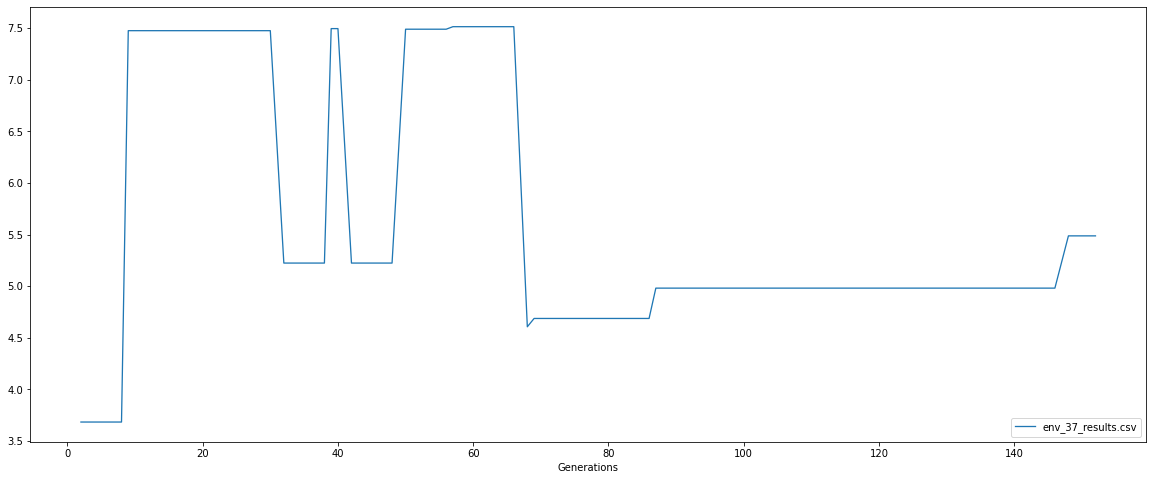

<Figure size 1440x576 with 0 Axes>

In [140]:
plt.figure(figsize=(20,8))
plt.plot(df["gen"], df["best_fit"], lw =1.3, label=csvs_name.value)



plt.xlabel("Generations")
plt.legend(loc="lower right")
plt.figure(figsize=(20,8))
plt.show()

In [132]:
valid_envs = {}
for csv in csvs:
    file_name = dir_path + "/" + csv
    temp_df = pd.read_csv(file_name, sep=';')
    if len(temp_df) > 30:
        valid_envs[csv] = temp_df

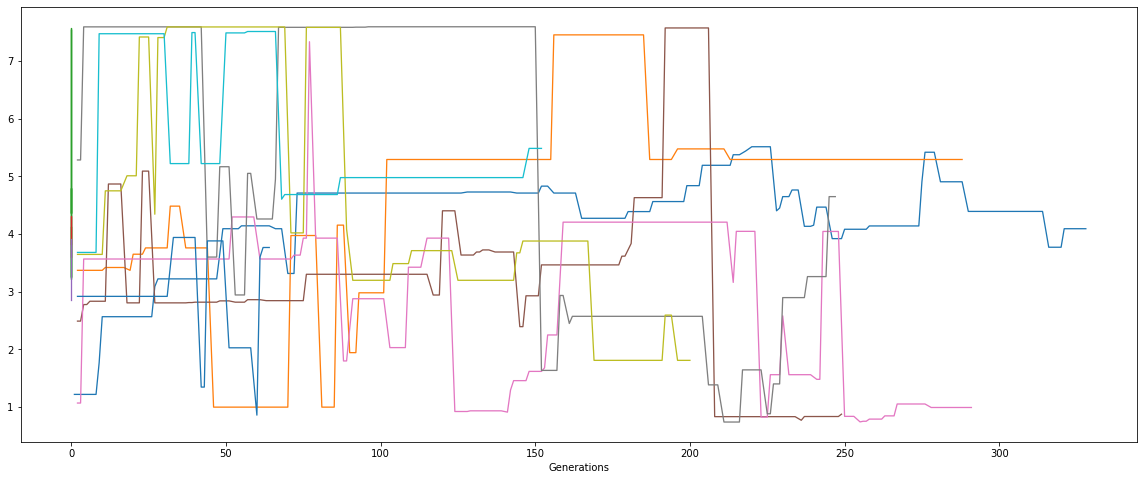

0


In [119]:
largest_size = 0

plt.figure(figsize=(20,8))

for name in valid_envs:
    # largest_size = max(largest_size, len(valid_envs[name]["global_gen"]))
    plt.plot(valid_envs[name]["gen"], valid_envs[name]["best_fit"], lw =1.3, label=name)


plt.xlabel("Generations")
# plt.legend(loc="lower right")
plt.show()
print(largest_size)